In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import requests
import seaborn as sns

## 1.Загрузить файл hr.csv.

In [2]:
df = pd.read_csv('hr.csv', sep = ',')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Зарпалата является важным фактором удовлетворенности сотрудников, 
но в текущем формате рассчитывать корреляции сложно. Заменим на числовые значения

In [4]:
df['salary'].replace('low', 1, inplace = True)
df['salary'].replace('medium', 2, inplace = True)
df['salary'].replace('high', 3, inplace = True)

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [5]:
NA_check = df[df.isna().any(axis=1)]
NA_check.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary


Пропущенные значения отсутствуют

## 2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


## 3.Рассчитать и визуализировать корреляционную матрицу для переменных.

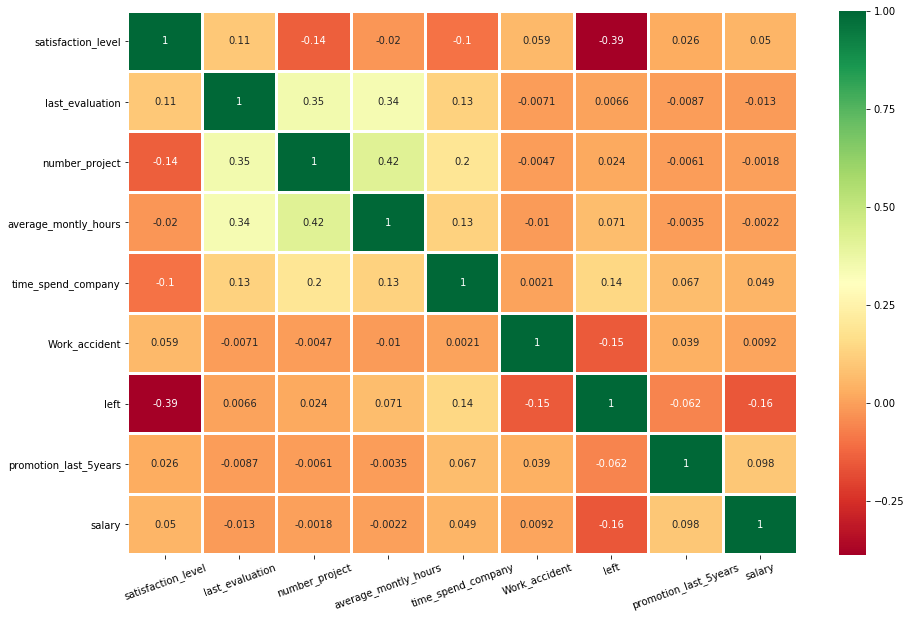

In [7]:
ax = sns.heatmap(df.corr(), annot = True, cmap='RdYlGn', linewidths = 2)
fig = plt.gcf()
fig.set_size_inches(15, 10)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom +0.5, top -0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 20)
plt.show()

Каких-то явных корреляций на первый взгляд не заметно. Вполне логично, что для уволившихся характерен отрицательный знак в корреляции с уровнем удовлетворенности. Количество проектов имеет некую взаимосвязь со средними рабочими часами в месяц. Но в любом случае, какого-то однозначного фактора, оказывающего влияние на сотрудников, нет.

## 4.Визуализировать несколько взаимосвязей между переменными.

Text(0.5, 1.0, 'Удовлетворенность/средние рабочие часы в месяц среди уволившихся')

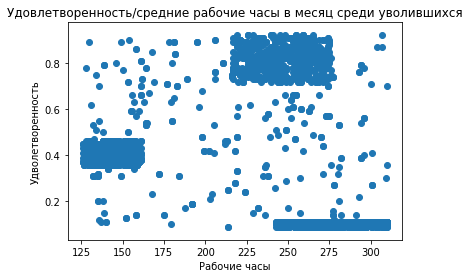

In [8]:
left = df[df['left'] == 1]
plt.scatter(left['average_montly_hours'], left['satisfaction_level'])
plt.xlabel('Рабочие часы')
plt.ylabel('Удволетворенность')
plt.title('Удовлетворенность/средние рабочие часы в месяц среди уволившихся')

Среди уволившихся выделяются три явные группы. Крайне низкий уровень удовлетворенности у людей, работающих больше 240 часов в неделю, что логично. Можем посмотреть на эту группу выделенно и, например, определить с какими отделами связана такая повышенная нагрузка.

In [41]:
left1 = df[(df['average_montly_hours'] > 240) & (df['satisfaction_level'] < 0.2)]
left1.groupby('sales').count()['satisfaction_level']

sales
IT              95
RandD           45
accounting      67
hr              52
management      31
marketing       52
product_mng     50
sales          265
support        145
technical      221
Name: satisfaction_level, dtype: int64

Также, чтобы избежать ухода текущих сотрудников, можно проверить справедливость вознаграждения, которые они получают за труд. Проверим средние рабочие часы и уровень зарплаты. По идее одни должны положительно коррелировать. За большие рабочие часы - больше вознаграждения

In [9]:
working = df[df['left'] == 0].groupby('average_montly_hours').mean().reset_index()
working.head()

,average_montly_hours,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,96,0.530000,0.681667,3.833333,3.000000,0.166667,0.0,0.000000,1.666667
1,97,0.524286,0.627857,4.071429,4.357143,0.142857,0.0,0.000000,1.642857
2,98,0.579565,0.654783,3.913043,3.347826,0.130435,0.0,0.000000,1.347826
3,99,0.430000,0.634545,3.727273,3.545455,0.363636,0.0,0.000000,1.727273
4,100,0.483158,0.606842,3.526316,4.631579,0.421053,0.0,0.105263,1.578947


Text(0.5, 1.0, 'Уровень ЗП/средние рабочие часы в месяц среди работающих')

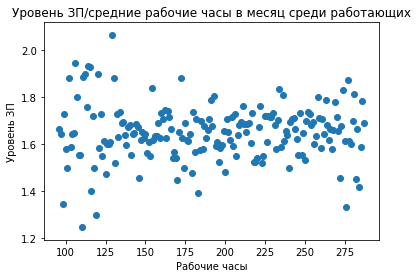

In [10]:
plt.scatter(working['average_montly_hours'], working['salary'])
plt.xlabel('Рабочие часы')
plt.ylabel('Уровень ЗП')
plt.title('Уровень ЗП/средние рабочие часы в месяц среди работающих')

К сожалению, по графику видно, что количество отработанных часов практически не влияет на рост заработной платы. Она остается в среднем диапазоне вне зависимости от количество часов.

## 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

Предположим, что для того, чтобы стать менеджером, нужно долго и усердно трудиться и тогда компания тебя оценит. Проверим, насколько время работы менеджеров коррелирует со временем работы сотрудников. Гипотеза - оно должно статистически значимо отличаться

In [11]:
df['sales'].unique()
# сравним менеджмент c генеральной совокупностью по времени работы в компании

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [12]:
alpha = 0.05

mng_time = df[df['sales'] == 'management']['average_montly_hours']
stats.ttest_1samp(mng_time, df['average_montly_hours'].mean())

Ttest_1sampResult(statistic=0.10534678171106357, pvalue=0.9161342281490217)

In [13]:
print('Менеджеры: ', len(mng_time))

Менеджеры:  630


t-критерий < критического, p-value довольно высокий, можем принять нулевую гипотезу. Ср. время работы у менеджеров не отличается от генеральной совокупности. Можно предположить, что компания предпочитает найм менеджмента со стороны. Отделу HR стоит задуматься о росте кадров внутри компании и повышении уровня лояльности сотрудников

Савним уровень удовлетоворенности ушедших с оставшимися на на работе

In [15]:
left = df[df['left'] == 1]['satisfaction_level']
work =  df[df['left'] == 0]['satisfaction_level']
stats.ttest_ind(work, left)

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)

t-критерий > критического, p-value = 0. Группы статистически значимо различаются.
Вполне очевидный вывод о том, что уровень удовлетворенности для ушедших сотрудников ниже. Однако это дает нам информацию о том, что а)рейтингу удовлетворенности следует доверять б) регулярные оценки необходимо отслеживать в динамике в) рост уровня удовлетворенности сотрудников может стать KPI для HR. Повышение его уровня сократит текучку лучше, чем попытки удержать уходящие кадры в последний момент. Рейтинг удовлетворенности и факторы, влияющие на него могут представлять серьезный интерес для более глубокого исследования.


## 6.Рассчитать сколько работников работает в каждом департаменте.

In [16]:
count = df[df['left'] == 0].groupby('sales').count() #считаем без учета уволившихся
hired = count['satisfaction_level'].to_dict()
for k, v in hired.items():
    print('Количество сотрудников в отделе', k, ':', v)

Количество сотрудников в отделе IT : 954
Количество сотрудников в отделе RandD : 666
Количество сотрудников в отделе accounting : 563
Количество сотрудников в отделе hr : 524
Количество сотрудников в отделе management : 539
Количество сотрудников в отделе marketing : 655
Количество сотрудников в отделе product_mng : 704
Количество сотрудников в отделе sales : 3126
Количество сотрудников в отделе support : 1674
Количество сотрудников в отделе technical : 2023


## 7.Показать распределение сотрудников по зарплатам.

In [17]:
salary = df[df['left'] == 0]

Text(0.5, 1.0, 'Распределение по ЗП')

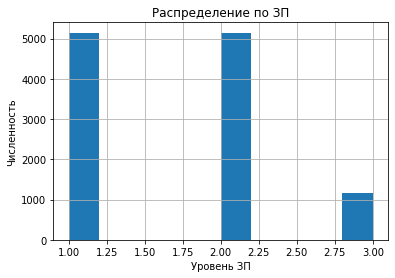

In [23]:
salary['salary'].hist()
plt.xlabel('Уровень ЗП')
plt.ylabel('Численность')
plt.title('Распределение по ЗП')

## 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

In [24]:
ax1 = df.loc[df.sales=='sales', 'salary']
ax2 = df.loc[df.sales=='accounting', 'salary']
ax3 = df.loc[df.sales=='hr', 'salary']
ax4 = df.loc[df.sales=='technical', 'salary']
ax5 = df.loc[df.sales=='support', 'salary']
ax6 = df.loc[df.sales=='management', 'salary']
ax7 = df.loc[df.sales=='IT', 'salary']
ax8 = df.loc[df.sales=='product_mng', 'salary']
ax9 = df.loc[df.sales=='marketing', 'salary']
ax10 = df.loc[df.sales=='RandD', 'salary']

Text(0.5, 1.0, 'Распределение по ЗП по отделам')

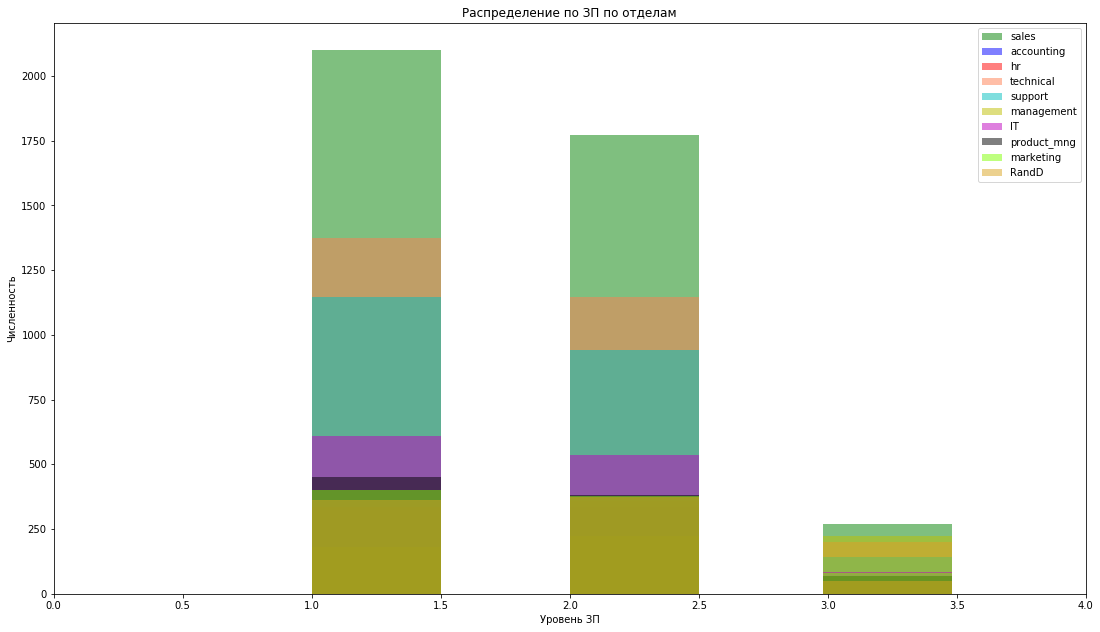

In [36]:
kwargs = dict(alpha=0.5, bins=100)
plt.hist(ax1, **kwargs, color='g', label='sales', width=0.5)
plt.hist(ax2, **kwargs, color='b', label='accounting', width=0.5)
plt.hist(ax3, **kwargs, color='r', label='hr', width=0.5)
plt.hist(ax4, **kwargs, color='coral', label='technical', width=0.5)
plt.hist(ax5, **kwargs, color='c', label='support', width=0.5)
plt.hist(ax6, **kwargs, color='y', label='management', width=0.5)
plt.hist(ax7, **kwargs, color='m', label='IT', width=0.5)
plt.hist(ax8, **kwargs, color='k', label='product_mng', width=0.5)
plt.hist(ax9, **kwargs, color='chartreuse', label='marketing', width=0.5)
plt.hist(ax10, **kwargs, color='goldenrod', label='RandD', width=0.5)
plt.gca().set(title='Frequency Histogram of Diamond Depths', ylabel='Frequency')
plt.xlim([0.,4])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.legend()
plt.xlabel('Уровень ЗП')
plt.ylabel('Численность')
plt.title('Распределение по ЗП по отделам')

Пункты 6, 7 и 8  - говорят сами за себя. Однако вызывают вопросы отделы бухгалтерии и HR - нужны ли там отделы по 500 человек :) Основную нагрузку на ФОТ создают Sales, Support и RnD. Эти департаменты, возможно, требуют оптимизации.

## 9.Сколько сотрудников покинули компанию.

In [26]:
print('Количество сотрудников, покинувших компанию:', len(df[df['left'] == 1]))

Количество сотрудников, покинувших компанию: 3571


## 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [27]:
left = df[df['left'] == 1]
working = df[df['left'] == 0]

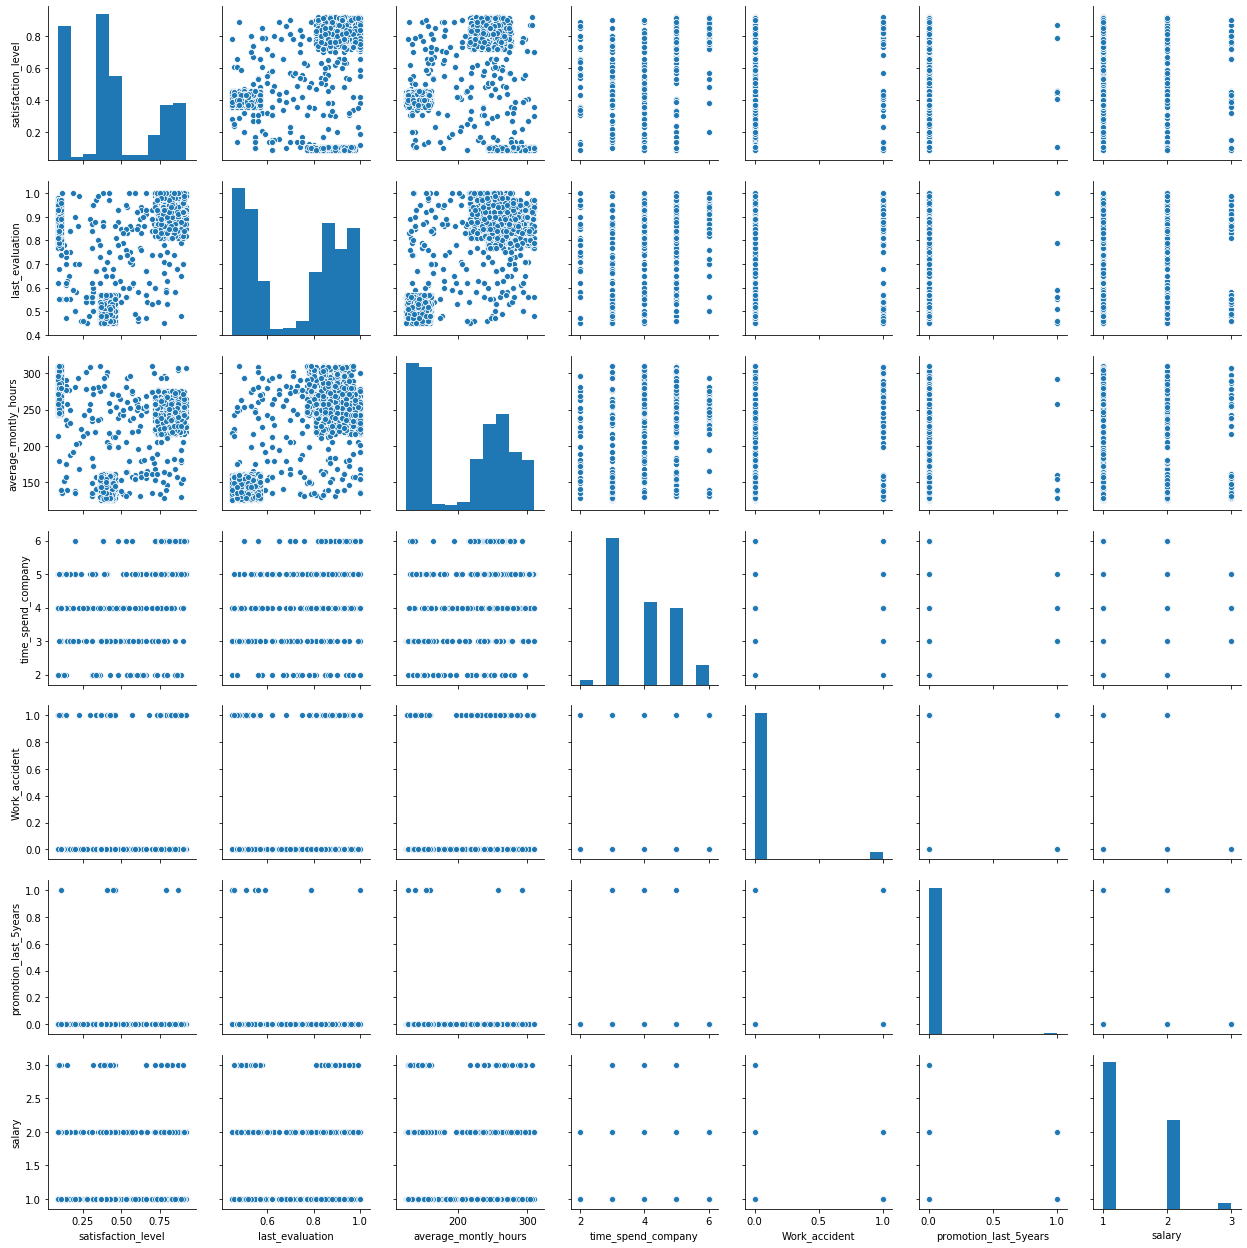

In [28]:
# уволившиеся
corr = sns.pairplot(
    left[['satisfaction_level','last_evaluation', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary']])
corr

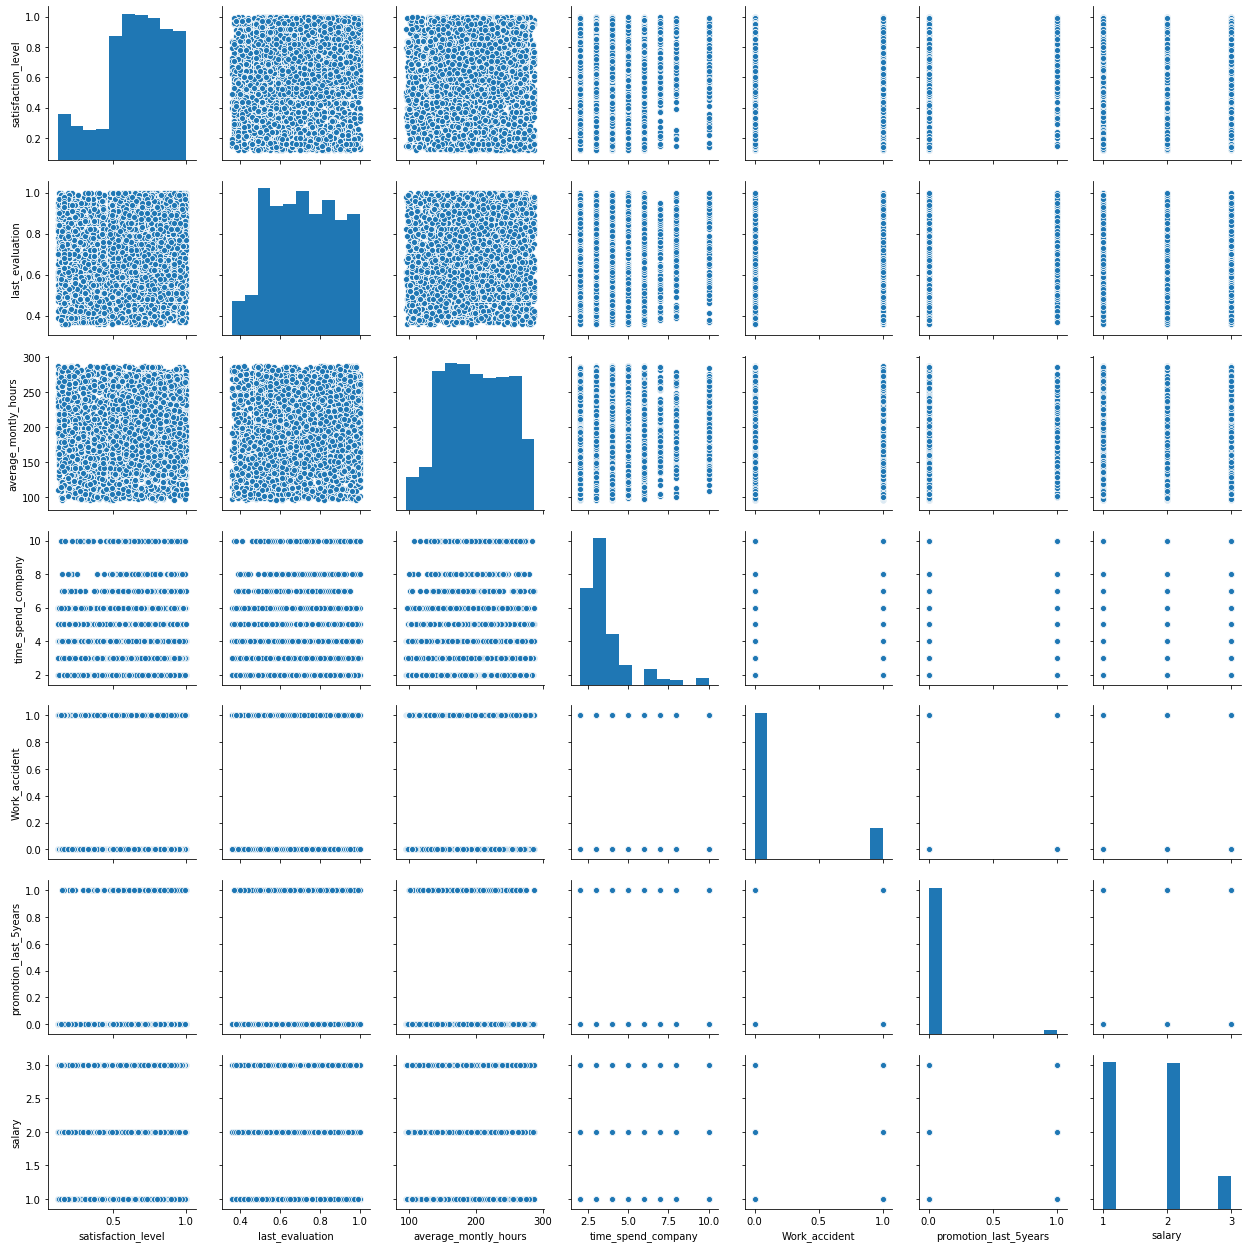

In [29]:
# работающие
corr = sns.pairplot(
    working[['satisfaction_level','last_evaluation', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary']])
corr

По графикам можно заметить, что satisfaction_level для уволившихся < 0.4, в то время, как у тех, кто продолжает работать, этот уровень выше 0,4. Также заметно, что среди уволившихся преобладает либо слишком малое кол-во рабочих часов, либо оно выше среднего. Проверим

In [30]:
from scipy.stats import kendalltau
stat, p = kendalltau(left['satisfaction_level'], left['average_montly_hours'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Показатели не коррелируют')
else:
    print('Показатели коррелируют')

stat=-0.088, p=0.000
Показатели коррелируют


Возможно уход сотрудников связан с неудовлетворенностью менеджментом графика работы.

Также заметно, что среди уволившихся большая часть с ЗП уровня 1. Уровень 2 и 3 почти в два раза меньше. Возможная причина увольнений - недовольство заработной платой. Проверим.

In [31]:
stat, p = kendalltau(left['satisfaction_level'], left['salary'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Показатели не коррелируют')
else:
    print('Показатели коррелируют')

stat=-0.003, p=0.845
Показатели не коррелируют
